In [358]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [405]:
# 1,500
t = [8,30,8,15,8,2,7,49,7,37,7,25,7,14,7,4,6,54,6,44,6,35,6,27,6,19,6,11,6,3,
     5,56,5,49,5,42,5,36,5,30,5,24,5,18,5,13,5,7,5,2,4,57,4,53,4,48,4,44,4,39,
     4,35,4,31,4,27,4,24,4,20,4,16,4,13,4,10,4,6,4,3,4,0,3,57,3,54,3,52,3,49,
     3,46,3,44,3,41,3,39,3,37,3,34,3,32,3,30,3,28,3,26,3,24]
t_tuple = [(i, *t) for i, t in enumerate(zip(t[0::2], t[1::2]), start=30)]
data = [[vdot, datetime.timedelta(minutes=m, seconds=s)] for vdot, m, s in t_tuple]

In [400]:
# marathon
t = [4,49,17,4,41,57,4,34,59,4,28,22,4,22,3,4,16,3,4,10,19,4,4,50,3,59,35,
     3,54,34,3,49,45,3,45,9,3,40,43,3,36,28,3,32,23,3,28,26,3,24,39,3,21,0,
     3,17,29,3,14,6,3,10,49,3,7,39,3,4,36,3,1,39,2,58,47,2,56,1,2,53,20,2,50,45,
     2,48,14,2,45,47,2,43,25,2,41,8,2,38,54,2,36,44,2,34,38,2,32,35,2,30,36,
     2,28,40,2,26,47,2,24,57,2,23,10,2,21,26,2,19,44,2,18,5,2,16,29,2,14,55,
     2,13,23,2,11,54,2,10,27,2,9,2,2,7,38,2,6,17,2,4,57,2,3,40,2,2,24,2,1,10]
t_tuple = [(i, *t) for i, t in enumerate(zip(t[0::3], t[1::3], t[2::3]), start=30)]
data = [[vdot, datetime.timedelta(hours=h, minutes=m, seconds=s)] for vdot, h, m, s in t_tuple]

In [406]:
df = pd.DataFrame(data=data, columns=['vdot', 'time'])

df['seconds'] = df['time'].apply(lambda x: int(x.total_seconds()))
df['vdot_log'] = np.log(df.vdot)
df['vdot_reciprocal'] = 1/df.vdot
df['vdot_pow2'] = df.vdot ** 2
df['vdot_pow3'] = df.vdot ** 3
df.head()

,vdot,time,seconds,vdot_log,vdot_reciprocal,vdot_pow2,vdot_pow3
0,30,0 days 00:08:30,510,3.401197,0.033333,900,27000
1,31,0 days 00:08:15,495,3.433987,0.032258,961,29791
2,32,0 days 00:08:02,482,3.465736,0.031250,1024,32768
3,33,0 days 00:07:49,469,3.496508,0.030303,1089,35937
4,34,0 days 00:07:37,457,3.526361,0.029412,1156,39304


Text(0.5, 1.0, 'x5 vdotpow3')

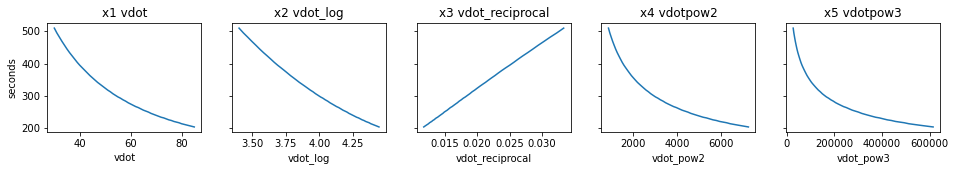

In [407]:
fig, ax = plt.subplots(1, 5, figsize=(16, 2), sharey=True)
sns.lineplot(x=df.vdot, y=df.seconds, ax=ax[0]).set_title('x1 vdot')
sns.lineplot(x=df.vdot_log, y=df.seconds, ax=ax[1]).set_title('x2 vdot_log')
sns.lineplot(x=df.vdot_reciprocal, y=df.seconds, ax=ax[2]).set_title('x3 vdot_reciprocal')
sns.lineplot(x=df.vdot_pow2, y=df.seconds, ax=ax[3]).set_title('x4 vdotpow2')
sns.lineplot(x=df.vdot_pow3, y=df.seconds, ax=ax[4]).set_title('x5 vdotpow3')

In [408]:
from sklearn.linear_model import LinearRegression

X = df[['vdot', 'vdot_log', 'vdot_reciprocal', 'vdot_pow2', 'vdot_pow3']]
y = df.seconds

clf = LinearRegression()
clf.fit(X, y)

print(clf.score(X, y))
print(np.round((clf.predict(X)), 0) - df.seconds.values)
print(f"np.array([{clf.intercept_}, {clf.coef_[0]}, {clf.coef_[1]}, {clf.coef_[2]}, {clf.coef_[3]}, {clf.coef_[4]}]),")

0.99999013576423
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
np.array([1182.085091699069, 6.367170440963579, -322.778681874542, 7865.746434686376, -0.03397766949704373, 0.00011018322157951843]),


### weights and methods

In [431]:
metadata = {
    'e_pace': {
        'distance': 1.0,
        'weights': None,
    },
    't_pace': {
        'distance': 1.0,
        'weights': None,
    },
    'i_pace': {
        'distance': 1.0,
        'weights': None,
    },
    'r_pace': {
        'distance': 1.0,
        'weights': None,
    },
    '1.5k': {
        'distance': 1.5,
        'weights': np.array([1182.085091699069, 6.367170440963579, -322.778681874542, 7865.746434686376, -0.03397766949704373, 0.00011018322157951843]),
    },
    '1 mile': {
        'distance': 1.60934,
        'weights': None,
    },
    '3k': {
        'distance': 3.0,
        'weights': None,
    },
    '2 mile': {
        'distance': 3.21869,
        'weights': None,
    },
    '5k': {
        'distance': 5.0,
        'weights': None,
    },
    '10k': {
        'distance': 10.0,
        'weights': None,
    },
    'half marathon': {
        'distance': 21.0975,
        'weights': None,
    },
    'marathon': {
        'distance': 42.195,
        'weights': np.array([60636.22986513261, 246.74130046555726, -15730.318846607715, 109197.36142110199, -0.9739181072484939, 0.002111978999892017]),
    }
}

def get_time(vdot, race):
    X = np.array([1, vdot, np.log(vdot), 1/vdot, vdot**2, vdot**3])
    w = metadata[race]['weights']
    seconds = X @ w
    return datetime.timedelta(seconds=seconds)

def calculate_pace(time: datetime.timedelta, distance: float) -> datetime.timedelta:
    return time / distance

def calculate_time(distance: float, pace: datetime.timedelta) -> datetime.timedelta:
    return distance * pace

def calculate_distance(time: datetime.timedelta, pace: datetime.timedelta) -> float:
    return np.round(time / pace, 5)

def convert_pace_km_to_miles(pace: datetime.timedelta) -> datetime.timedelta:
    return pace / 0.621371

def convert_pace_miles_to_km(pace: datetime.timedelta) -> datetime.timedelta:
    return pace * 0.621371

def format_time(td: datetime.timedelta, strip: bool=True):
    td = datetime.timedelta(seconds=td.seconds).__str__()
    return re.search(pattern=r'[1-9].*', string=td).group() if strip else td

In [432]:
vdot = 65
race = ['marathon', '1.5k'][0]
distance = metadata[race]['distance']
time = get_time(vdot, race)
print(f'vdot: {vdot} \nrace: {race} \ndistance: {distance} \ntime: {format_time(time)}')

pace = calculate_pace(time, distance)
pace_mi = convert_pace_km_to_miles(pace)
time = calculate_time(distance, pace)
distance = calculate_distance(time, pace)
print(f'\npace (km): {format_time(pace)} \npace (mi): {format_time(pace_mi)} \ntime: {format_time(time)} \ndistance: {distance}')

print(f'\n{[(i, format_time(get_time(vdot=i, race=race))) for i in range(30, 85, 5)]}')

vdot: 65 
race: marathon 
distance: 42.195 
time: 2:32:35

pace (km): 3:36 
pace (mi): 5:49 
time: 2:32:35 
distance: 42.195

[(30, '4:49:16'), (35, '4:16:02'), (40, '3:49:45'), (45, '3:28:26'), (50, '3:10:49'), (55, '2:56:01'), (60, '2:43:25'), (65, '2:32:35'), (70, '2:23:10'), (75, '2:14:55'), (80, '2:07:38')]
